In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
data=pd.read_csv('C:/Users/HP/Downloads/laptop_data.csv')

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.drop(columns=['Unnamed: 0'],inplace = True)

In [6]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
data['Ram']=data['Ram'].str.replace('GB','').astype(int)

In [8]:
data['Weight']=data['Weight'].str.replace('kg','').astype(float)

In [9]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

In [10]:
data['ScreenResolution'].sample(20)

1234                                      1366x768
8                                Full HD 1920x1080
854                    IPS Panel Full HD 1920x1080
102                              Full HD 1920x1080
781                    IPS Panel Full HD 1920x1080
942                                       1366x768
346                                       1366x768
817                                       1366x768
709                    IPS Panel Full HD 1920x1080
1071                                      1366x768
755     IPS Panel Quad HD+ / Touchscreen 3200x1800
133                              Full HD 1920x1080
884                                       1366x768
947                              Full HD 1920x1080
227                              Full HD 1920x1080
310                    IPS Panel Full HD 1920x1080
1022                   IPS Panel Full HD 1920x1080
619                 IPS Panel Touchscreen 1366x768
791                                      1920x1080
768                Full HD / To

In [11]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [12]:
data['IPS']=data['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [13]:
new=data['ScreenResolution'].str.split('x',expand=True)

In [14]:
data['Y_res']=new[1]

In [15]:
data['X_res']=new[0]

In [16]:


# Extract the last numeric value
data['X_res'] = data['X_res'].str.extract(r'(\d+)$')


In [17]:
data['X_res']=data['X_res'].astype(int)

data['Y_res']=data['Y_res'].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  Y_res             1274 non-null   int32  
 14  X_res             1274 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 144.3+ KB


In [19]:
data.drop(columns=['ScreenResolution'],inplace=True)

In [20]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Y_res,X_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560


In [21]:
data['ppi'] = ((data['X_res']**2 + data['Y_res']**2) ** 0.5 / data['Inches']).astype(float)


In [22]:
data.drop(columns=['X_res','Y_res','Inches'],inplace=True)

In [23]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [24]:
def categorize_cpu(cpu):
    cpu = str(cpu).lower()  # Convert to lowercase for consistency
    if "i5" in cpu:
        return 0  # Label for Intel i5
    elif "i7" in cpu:
        return 1  # Label for Intel i7
    elif "intel" in cpu:
        return 2  # Label for other Intel CPUs (Celeron, Pentium, etc.)
    elif "amd" in cpu:
        return 3  # Label for AMD processors
    else:
        return 4  # Optional: For any other unknown CPUs

# Apply the function to categorize CPUs
data['Cpu_Category'] = data['Cpu'].apply(categorize_cpu)


In [25]:
data['Cpu_Category'].value_counts()

Cpu_Category
1    502
0    423
2    286
3     62
4      1
Name: count, dtype: int64

In [26]:
data.corr(numeric_only=True)['Price']

Ram             0.714262
Weight          0.080449
Price           1.000000
Touchscreen     0.218059
IPS             0.246343
ppi             0.478605
Cpu_Category   -0.308644
Name: Price, dtype: float64

In [27]:
data.drop(columns=['Cpu'],inplace = True)

In [28]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Category
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,0


In [29]:
data['Memory'].value_counts()

Memory
256GB SSD                        407
1TB HDD                          222
500GB HDD                        132
512GB SSD                        113
128GB SSD +  1TB HDD              93
128GB SSD                         76
256GB SSD +  1TB HDD              70
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
256GB SSD +  2TB HDD              10
512GB SSD +  1TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
1TB SSD                            8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD         

In [30]:


# Function to extract memory values
def extract_memory(memory, storage_type):
    memory = memory.lower()  # Convert to lowercase for consistency
    if storage_type in memory:
        # Extract the numeric value before the storage type
        parts = memory.split()
        for i, part in enumerate(parts):
            if storage_type in part:
                try:
                    return int(parts[i-1].replace('gb', '').replace('tb', '000'))  # Convert TB to GB
                except:
                    return 0
    return 0

# Creating new columns
data['SSD'] = data['Memory'].apply(lambda x: extract_memory(x, 'ssd'))
data['HDD'] = data['Memory'].apply(lambda x: extract_memory(x, 'hdd'))
data['Flash_Storage'] = data['Memory'].apply(lambda x: extract_memory(x, 'flash'))
data['Hybrid'] = data['Memory'].apply(lambda x: extract_memory(x, 'hybrid'))

# Display the updated DataFrame



In [31]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Category,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,512,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0,0


In [32]:
data.drop(columns=['Memory'],inplace = True)

In [33]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Category,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1274 non-null   object 
 1   TypeName       1274 non-null   object 
 2   Ram            1274 non-null   int32  
 3   Gpu            1274 non-null   object 
 4   OpSys          1274 non-null   object 
 5   Weight         1274 non-null   float64
 6   Price          1274 non-null   float64
 7   Touchscreen    1274 non-null   int64  
 8   IPS            1274 non-null   int64  
 9   ppi            1274 non-null   float64
 10  Cpu_Category   1274 non-null   int64  
 11  SSD            1274 non-null   int64  
 12  HDD            1274 non-null   int64  
 13  Flash_Storage  1274 non-null   int64  
 14  Hybrid         1274 non-null   int64  
dtypes: float64(3), int32(1), int64(7), object(4)
memory usage: 154.3+ KB


In [35]:
data['Gpu']

0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: Gpu, Length: 1274, dtype: object

In [36]:
def categorize_gpu(gpu):
    gpu = str(gpu).lower()
    if "intel" in gpu:
        return "intel"
    elif "amd" in gpu:
        return "Amd"
    elif "nvidia" in gpu:
        return "Nividia"
    else:
        return "other"








data['Gpu_category']= data['Gpu'].apply(categorize_gpu)




In [37]:
data=data[data['Gpu_category']!='other']

In [38]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Category,SSD,HDD,Flash_Storage,Hybrid,Gpu_category
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0,0,intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128,0,intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0,0,intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,1,512,0,0,0,Amd
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0,0,intel


In [39]:
data.drop(columns=['Gpu'],inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Ram            1273 non-null   int32  
 3   OpSys          1273 non-null   object 
 4   Weight         1273 non-null   float64
 5   Price          1273 non-null   float64
 6   Touchscreen    1273 non-null   int64  
 7   IPS            1273 non-null   int64  
 8   ppi            1273 non-null   float64
 9   Cpu_Category   1273 non-null   int64  
 10  SSD            1273 non-null   int64  
 11  HDD            1273 non-null   int64  
 12  Flash_Storage  1273 non-null   int64  
 13  Hybrid         1273 non-null   int64  
 14  Gpu_category   1273 non-null   object 
dtypes: float64(3), int32(1), int64(7), object(4)
memory usage: 154.2+ KB


In [41]:
data['OpSys'].value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             62
Windows 7         41
Chrome OS         26
macOS             12
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [42]:
def categorize_opsys(ops):
    op=str(ops).lower()

    if "windows 10" in op:
        return "Windows 10"
    elif "windows 7"in op:
        return "Windows 7"

    elif "linux" in op:
        return "linux"

    elif "macos" in op:
        return "Macos" 
    else:
        return "other"

data['categorize_opsys']=data['OpSys'].apply(categorize_opsys)
        
                    

In [43]:
data['categorize_opsys'].value_counts()

categorize_opsys
Windows 10    1056
other          102
linux           62
Windows 7       41
Macos           12
Name: count, dtype: int64

In [44]:
data.drop(columns=['OpSys'],inplace = True)

In [45]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu_Category,SSD,HDD,Flash_Storage,Hybrid,Gpu_category,categorize_opsys
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,0,128,0,0,0,intel,Macos
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,0,0,0,128,0,intel,Macos
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,0,intel,other
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,1,512,0,0,0,Amd,Macos
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,0,256,0,0,0,intel,Macos


In [46]:
data.corr(numeric_only=True)['Price']

Ram              0.714134
Weight           0.079779
Price            1.000000
Touchscreen      0.219901
IPS              0.247532
ppi              0.480705
Cpu_Category    -0.308278
SSD              0.657572
HDD             -0.100904
Flash_Storage   -0.033868
Hybrid          -0.003217
Name: Price, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_12756\460424880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

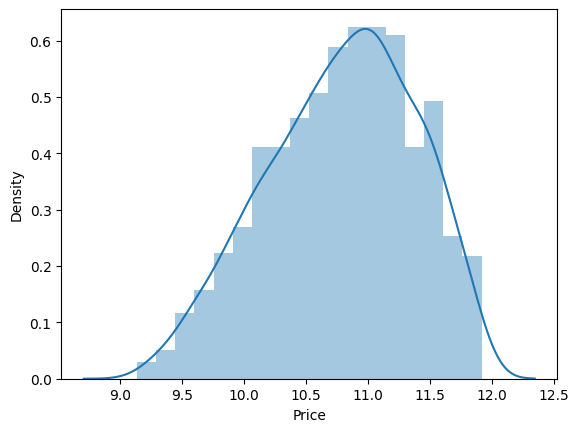

In [47]:
sns.distplot(np.log(data['Price']))

In [48]:
x=data.drop(columns=['Price'])

y=np.log(data['Price'])

In [49]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu_Category,SSD,HDD,Flash_Storage,Hybrid,Gpu_category,categorize_opsys
0,Apple,Ultrabook,8,1.37,0,1,226.983005,0,128,0,0,0,intel,Macos
1,Apple,Ultrabook,8,1.34,0,0,127.677940,0,0,0,128,0,intel,Macos
2,HP,Notebook,8,1.86,0,0,141.211998,0,256,0,0,0,intel,other
3,Apple,Ultrabook,16,1.83,0,1,220.534624,1,512,0,0,0,Amd,Macos
4,Apple,Ultrabook,8,1.37,0,1,226.983005,0,256,0,0,0,intel,Macos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,1,128,0,0,0,intel,Windows 10
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,1,512,0,0,0,intel,Windows 10
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,2,0,0,64,0,intel,Windows 10
1301,HP,Notebook,6,2.19,0,0,100.454670,1,0,1000,0,0,Amd,Windows 10


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

In [51]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu_Category,SSD,HDD,Flash_Storage,Hybrid,Gpu_category,categorize_opsys
497,HP,Notebook,8,1.48,0,0,157.350512,1,1000,0,0,0,intel,Windows 10
412,HP,Notebook,4,2.10,0,0,141.211998,2,0,1000,0,0,Amd,Windows 10
157,Asus,2 in 1 Convertible,8,1.10,1,0,165.632118,0,256,0,0,0,intel,Windows 10
662,Lenovo,Notebook,4,2.20,0,0,141.211998,0,0,500,0,0,intel,Windows 10
788,Acer,Gaming,16,4.20,0,1,127.335675,1,256,1000,0,0,Nividia,Windows 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Apple,Ultrabook,8,0.92,0,1,226.415547,2,0,0,256,0,intel,other
1122,HP,Notebook,8,1.43,0,0,157.350512,0,256,0,0,0,intel,Windows 7
1158,Lenovo,Notebook,8,2.50,0,0,141.211998,0,0,0,0,0,Amd,Windows 10
880,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,0,256,0,0,0,intel,Windows 10


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [53]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.svm import SVR


In [54]:
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), [0, 1, 12, 13])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),  # Added missing comma here
    ('step2', step2)   
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2_score:', r2_score(y_test, y_pred))
print('Mean_absolute_error:', mean_absolute_error(y_test, y_pred))

R2_score: 0.7844039686951578
Mean_absolute_error: 0.22154201250512567


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Ridge

In [55]:
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 12, 13])
], remainder='passthrough')

# Step 2: Define Model (Using Ridge instead of LinearRegression for tuning)
step2 = Ridge()

# Step 3: Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)   
])

# Step 4: Define Hyperparameter Grid
param_grid = {
    'step2__alpha': [0.01, 0.1, 1, 10, 100,0.2,0.005,0.45,50,23,3.5]  # Ridge Regression hyperparameter tuning
}

# Step 5: Apply GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Step 6: Get the Best Model
best_model = grid_search.best_estimator_

# Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# Step 8: Evaluate Model
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score on Training:", grid_search.best_score_)
print("R2 Score on Test:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warning

Best Parameters: {'step2__alpha': 0.1}
Best R2 Score on Training: -0.07372967764976467
R2 Score on Test: 0.7845111732438704
Mean Absolute Error: 0.22210277280842014


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# lasso regression

In [56]:
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 12, 13])
], remainder='passthrough')

# Step 2: Define Model (Using Ridge instead of LinearRegression for tuning)
step2 = Lasso()

# Step 3: Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)   
])

# Step 4: Define Hyperparameter Grid
param_grid = {
    'step2__alpha': [0.001,0.0001,0.01, 0.1, 1, 10, 100,0.2,0.005,0.45,50,23,3.5]  # Ridge Regression hyperparameter tuning
}

# Step 5: Apply GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Step 6: Get the Best Model
best_model = grid_search.best_estimator_

# Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# Step 8: Evaluate Model
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score on Training:", grid_search.best_score_)
print("R2 Score on Test:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warning

Best Parameters: {'step2__alpha': 0.0001}
Best R2 Score on Training: -0.07376410167370381
R2 Score on Test: 0.7856081967032573
Mean Absolute Error: 0.2225365271793204


In [57]:
# Step 1: Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 12, 13])
], remainder='passthrough')

# Step 2: Define Model
step2 = KNeighborsRegressor()

# Step 3: Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)   
])

# Step 4: Define Hyperparameter Grid (Fixed Parameter Name)
param_grid = {
    'step2__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 23, 30]  
}

# Step 5: Apply GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the Best Model
best_model = grid_search.best_estimator_

# Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# Step 8: Evaluate Model
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score on Training:", grid_search.best_score_)
print("R2 Score on Test:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best Parameters: {'step2__n_neighbors': 3}
Best R2 Score on Training: -0.07790036619312697
R2 Score on Test: 0.8077794419584382
Mean Absolute Error: 0.196843979500273


# decison tree regressor

In [58]:

# Step 1: Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 12, 13])
], remainder='passthrough')

# Step 2: Define Model
step2 = DecisionTreeRegressor(random_state=42)

# Step 3: Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)   
])

# Step 4: Define Hyperparameter Grid
param_grid = {
    'step2__max_depth': [3, 5, 10,8,13, 15, None],  # Depth of the tree
    'step2__min_samples_split': [2, 5, 10],   # Min samples required to split
    'step2__min_samples_leaf': [1, 2, 4]      # Min samples per leaf node
}

# Step 5: Apply GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the Best Model
best_model = grid_search.best_estimator_

# Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# Step 8: Evaluate Model
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score on Training:", grid_search.best_score_)
print("R2 Score on Test:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Best Parameters: {'step2__max_depth': 10, 'step2__min_samples_leaf': 1, 'step2__min_samples_split': 10}
Best R2 Score on Training: -0.07224693490939638
R2 Score on Test: 0.8143419770756958
Mean Absolute Error: 0.19932518436951546


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# random forest regressor

In [59]:

from sklearn.model_selection import RandomizedSearchCV


# Step 1: Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 12, 13])
], remainder='passthrough')

# Step 2: Define Model
step2 = RandomForestRegressor(random_state=42, n_jobs=-1)

# Step 3: Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)   
])

# Step 4: Define Hyperparameter Grid
param_dist = {
    'step2__n_estimators': np.arange(50, 200, 50),
    'step2__max_depth': [None, 10, 20],
    'step2__min_samples_split': [2, 5, 10],
    'step2__min_samples_leaf': [1, 2, 4]
}

# Step 5: Apply RandomizedSearchCV (Faster than GridSearchCV)
random_search = RandomizedSearchCV(pipe, param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Step 6: Get the Best Model
best_model = random_search.best_estimator_

# Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# Step 8: Evaluate Model
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score on Training:", random_search.best_score_)
print("R2 Score on Test:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Best Parameters: {'step2__n_estimators': 50, 'step2__min_samples_split': 2, 'step2__min_samples_leaf': 1, 'step2__max_depth': None}
Best R2 Score on Training: -0.0511138876682291
R2 Score on Test: 0.8812512410944794
Mean Absolute Error: 0.15655682415067204


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# adaboost

In [60]:

# Step 1: Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 12, 13])
], remainder='passthrough')


# Step 2: Define Model
step2 = AdaBoostRegressor(random_state=42)

# Step 3: Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)   
])

# Step 4: Define Hyperparameter Grid
param_dist = {
    'step2__n_estimators': [50, 100, 200],  
    'step2__learning_rate': [0.01, 0.1, 1]  
}

# Step 5: Apply RandomizedSearchCV
random_search = RandomizedSearchCV(pipe, param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Step 6: Get the Best Model
best_model = random_search.best_estimator_

# Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# Step 8: Evaluate Model
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score on Training:", random_search.best_score_)
print("R2 Score on Test:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'step2__n_estimators': 50, 'step2__learning_rate': 1}
Best R2 Score on Training: -0.07454376006470602
R2 Score on Test: 0.7900770599487228
Mean Absolute Error: 0.22861038763389507


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## voting regressor

In [61]:


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor

# Ensure OneHotEncoder works properly
step1 = ColumnTransformer(transformers=[
    ('col_1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0, 1, 12, 13]) # Ensure correct indices
], remainder='passthrough')

# Define base models
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
et = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
ab = AdaBoostRegressor(n_estimators=100, random_state=42)

# Voting Regressor
voting_reg = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('et', et),
    ('ab', ab)
])

# Pipeline to ensure proper transformation
pipe = Pipeline([
    ('step1', step1),  # Apply OneHotEncoder
    ('step2', voting_reg)  # Train Model
])

# Fit the pipeline
pipe.fit(X_train, y_train)  # Now it will correctly transform data before training

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error
print("R2 Score on Test:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))



R2 Score on Test: 0.8777045062013995
Mean Absolute Error: 0.16554506979130434


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## exporting the model

In [62]:
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu_Category,SSD,HDD,Flash_Storage,Hybrid,Gpu_category,categorize_opsys
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,0,128,0,0,0,intel,Macos
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,0,0,0,128,0,intel,Macos
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,0,intel,other
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,1,512,0,0,0,Amd,Macos
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,0,256,0,0,0,intel,Macos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,1,128,0,0,0,intel,Windows 10
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,1,512,0,0,0,intel,Windows 10
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,2,0,0,64,0,intel,Windows 10
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,1,0,1000,0,0,Amd,Windows 10


In [63]:
import pickle

#pickle.dump(data,open('data.pkl','wb'))
#pickle.dump(pipe,open('pipe.pkl','wb'))

In [69]:
data['Hybrid'].value_counts()

Hybrid
0      1272
508       1
Name: count, dtype: int64